In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew,kurtosis
from scipy.special import boxcox1p

In [2]:
train = pd.read_csv("train__updated.csv")
test = pd.read_csv("test__updated.csv")

In [3]:
train.head()

,index,year,month,day,hour,latitude,longitude,imma_version,attm_count,time_indicator,...,platform_type,dup_status,dup_check,nightday_flag,source_exclusion_flags,release_no_primary,release_no_secondary,release_no_tertiary,release_status_indicator,intermediate_reject_flag
0,train_0,1978,1,1,0.0,48.8,-126.0,1,4,NaN,...,6.0,1,2.0,2,NaN,3,0,1,0,1
1,train_1,1978,1,1,0.0,49.7,-127.9,1,4,NaN,...,6.0,1,2.0,2,NaN,3,0,1,0,1
2,train_2,1978,1,1,0.0,50.9,-129.9,1,4,NaN,...,6.0,1,2.0,2,NaN,3,0,1,0,1
3,train_3,1978,1,1,0.0,51.4,-128.8,1,4,NaN,...,6.0,1,2.0,2,NaN,3,0,1,0,1
4,train_4,1978,1,1,0.0,49.3,-123.7,1,4,NaN,...,6.0,1,2.0,2,NaN,3,0,1,0,1


In [4]:
test.head()

,index,year,month,day,hour,latitude,longitude,imma_version,attm_count,time_indicator,...,platform_type,dup_status,dup_check,nightday_flag,source_exclusion_flags,release_no_primary,release_no_secondary,release_no_tertiary,release_status_indicator,intermediate_reject_flag
0,test_50000,1978,5,30,4.83,48.3,-123.2,1,4,NaN,...,6.0,1,2.0,1,NaN,3,0,1,0,1
1,test_50001,1978,5,30,5.00,49.3,-123.7,1,4,NaN,...,6.0,1,2.0,1,NaN,3,0,1,0,1
2,test_50002,1978,5,30,5.00,49.9,-125.0,1,4,NaN,...,6.0,1,2.0,1,NaN,3,0,1,0,1
3,test_50003,1978,5,30,5.00,53.8,-128.8,1,4,NaN,...,6.0,1,2.0,1,NaN,3,0,1,0,1
4,test_50004,1978,5,30,5.00,46.9,-125.0,1,4,NaN,...,6.0,1,2.0,1,NaN,3,0,1,0,1


In [5]:
train_index = train['index']
test_index = test['index']

In [6]:
train.drop("index", axis = 1, inplace = True)
test.drop("index", axis = 1, inplace = True)

/home/abhilash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")



 mu = 137.12 and sigma = 129.94



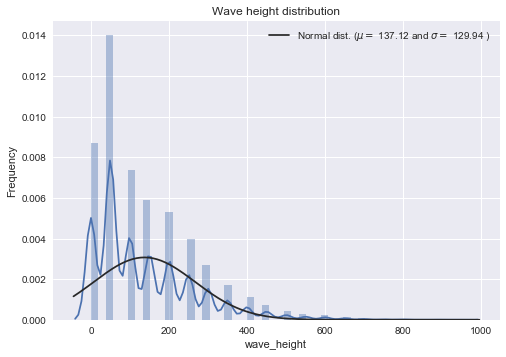

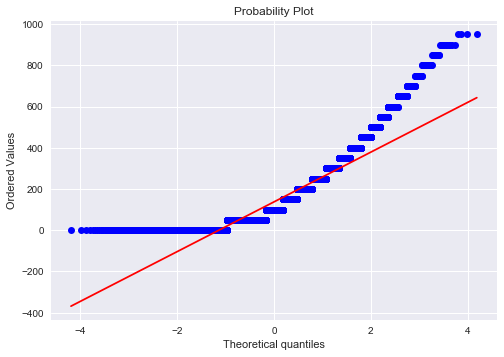

In [7]:
sns.distplot(train['wave_height'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['wave_height'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Wave height distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['wave_height'], plot=plt)
plt.show()

/home/abhilash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")



 mu = 6.04 and sigma = 0.27



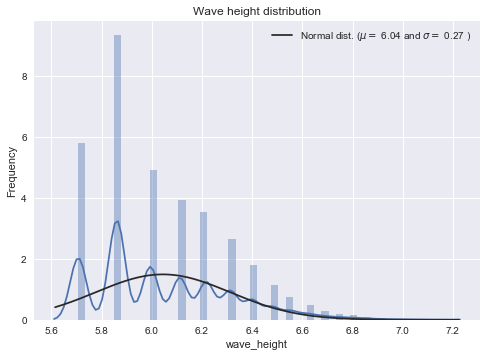

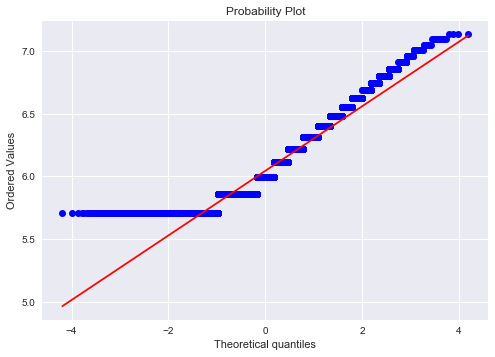

In [8]:
#Log-transformation of the target variable. (We applied log transformation, 
# box-cox transformation and cube root transformation on the target variable, of which, log 
# transformation gave the best results).
train["wave_height"] = np.log1p(train["wave_height"]+300)

#Check the new distribution 
sns.distplot(train['wave_height'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['wave_height'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Wave height distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['wave_height'], plot=plt)
plt.show()

In [9]:
#Data Correlation
corrmat = train.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [10]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.wave_height.values
train.drop(['wave_height'], axis=1, inplace=True)
all_data = pd.concat((train, test)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (86546, 52)


In [11]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
source_exclusion_flags,100.000000
dpt_indicator,100.000000
national_source_indicator,99.652208
wetbulb_temperature,98.257574
wbt_indicator,98.242553
present_weather,96.861784
lower_cloud_amount,96.817877
past_weather,96.733529
visibility,96.165045
total_cloud_amount,96.144247


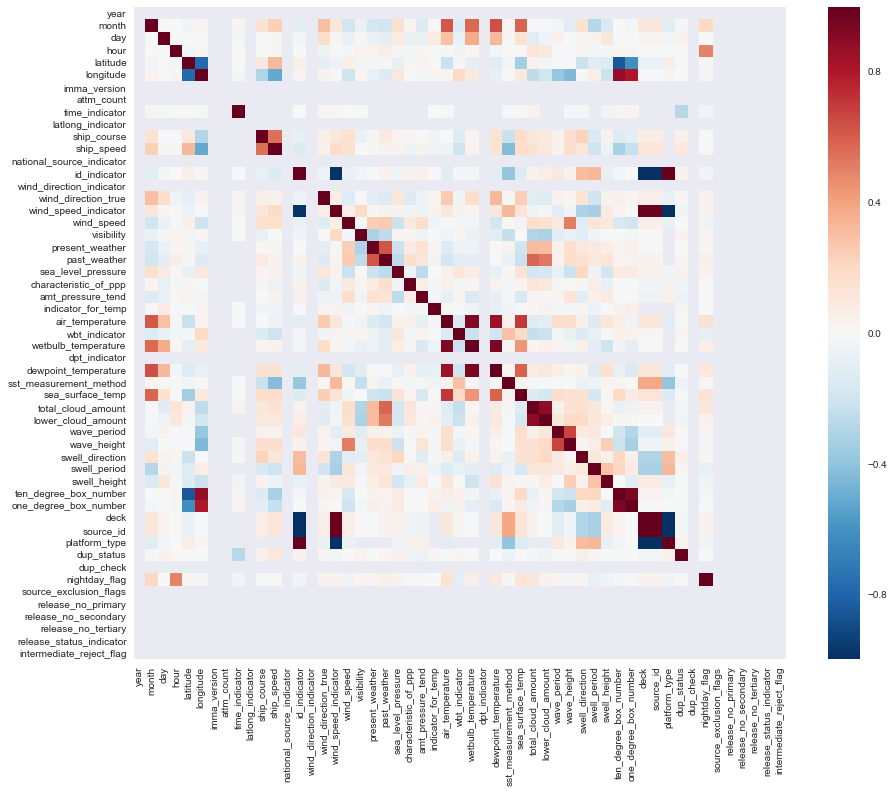

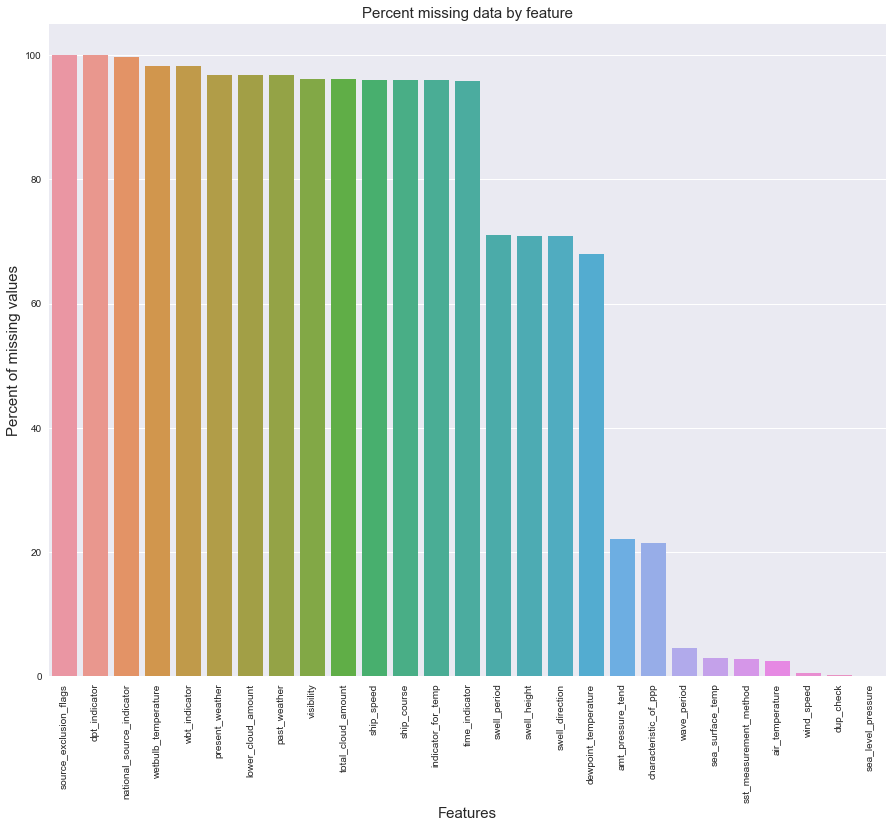

In [12]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

In [13]:
all_data.drop("release_no_primary", axis = 1, inplace = True)
all_data.drop("release_no_secondary", axis = 1, inplace = True)
all_data.drop("release_no_tertiary", axis = 1, inplace = True)
all_data.drop("release_status_indicator", axis = 1, inplace = True)
all_data.drop("intermediate_reject_flag", axis = 1, inplace = True)
all_data.drop("source_exclusion_flags", axis = 1, inplace = True)
all_data.drop("dup_check", axis = 1, inplace = True)
all_data.drop("dup_status", axis = 1, inplace = True)
all_data.drop("swell_direction", axis = 1, inplace = True)

In [14]:
all_data.drop("swell_period", axis = 1, inplace = True)
all_data.drop("sst_measurement_method", axis = 1, inplace = True)
all_data.drop("year", axis = 1, inplace = True)
#all_data.drop("day", axis = 1, inplace = True)
all_data.drop("imma_version", axis = 1, inplace = True)
all_data.drop("attm_count", axis = 1, inplace = True)
all_data.drop("latlong_indicator", axis = 1, inplace = True)
all_data.drop("national_source_indicator", axis = 1, inplace = True)
all_data.drop("wind_direction_indicator", axis = 1, inplace = True)
all_data.drop("dpt_indicator", axis = 1, inplace = True)

In [15]:
#all_data.drop("swell_direction", axis = 1, inplace = True)
#all_data.drop("wetbulb_temerature", axis = 1, inplace = True)
all_data.drop("dewpoint_temperature", axis = 1, inplace = True)
#all_data.drop("wetbulb_temerature", axis = 1, inplace = True)
all_data.drop("wbt_indicator", axis = 1, inplace = True)
all_data.drop("visibility", axis = 1, inplace = True)
all_data.drop("indicator_for_temp", axis = 1, inplace = True)
#all_data.drop("time indicator", axis = 1, inplace = True)

In [16]:
all_data.drop("wind_direction_true", axis = 1, inplace = True)
all_data.drop("wind_speed_indicator", axis = 1, inplace = True)
all_data.drop("platform_type", axis = 1, inplace = True)
all_data.drop("nightday_flag", axis = 1, inplace = True)
all_data.drop("deck", axis = 1, inplace = True)
all_data.drop("source_id", axis = 1, inplace = True)
all_data.drop("wetbulb_temperature", axis = 1, inplace = True)
all_data.drop("time_indicator", axis = 1, inplace = True)
all_data.drop("id_indicator", axis = 1, inplace = True)
all_data.drop("present_weather", axis = 1, inplace = True)
all_data.drop("past_weather", axis = 1, inplace = True)
all_data.drop("lower_cloud_amount", axis = 1, inplace = True)
all_data.drop("total_cloud_amount", axis = 1, inplace = True)
all_data.drop("ship_speed", axis = 1, inplace = True)
all_data.drop("ship_course", axis = 1, inplace = True)
#all_data.drop("characteristic_of_ppp", axis = 1, inplace = True)
#all_data.drop("hour", axis = 1, inplace = True)
#all_data.drop("latitude", axis = 1, inplace = True)

In [17]:
all_data.columns

Index(['month', 'day', 'hour', 'latitude', 'longitude', 'wind_speed',
       'sea_level_pressure', 'characteristic_of_ppp', 'amt_pressure_tend',
       'air_temperature', 'sea_surface_temp', 'wave_period', 'swell_height',
       'ten_degree_box_number', 'one_degree_box_number'],
      dtype='object')

In [18]:
all_data_na_again = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na_again = all_data_na_again.drop(all_data_na_again[all_data_na_again == 0].index).sort_values(ascending=False)[:30]
missing_val = pd.DataFrame({'Missing Ratio' :all_data_na_again})
missing_val

,Missing Ratio
swell_height,70.880226
amt_pressure_tend,22.074966
characteristic_of_ppp,21.438310
wave_period,4.528228
sea_surface_temp,2.991473
air_temperature,2.538534
wind_speed,0.514177
sea_level_pressure,0.124789


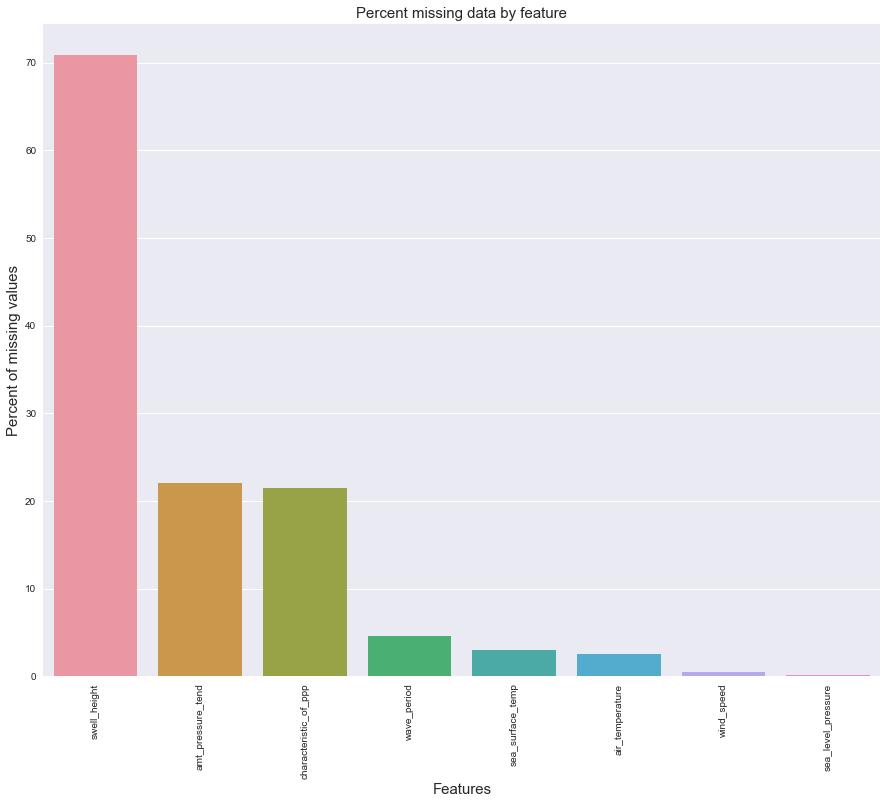

In [19]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na_again.index, y=all_data_na_again)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

In [20]:
missing_val.index

Index(['swell_height', 'amt_pressure_tend', 'characteristic_of_ppp',
       'wave_period', 'sea_surface_temp', 'air_temperature', 'wind_speed',
       'sea_level_pressure'],
      dtype='object')

In [21]:
#Since the features must be following a similar trend for a particular day
#of a particular month, filling of NaN values is filled by taking the 
#median of the feature values correspong to that month and day.
for col in missing_val.index:
    all_data[col] = all_data.groupby(["month","day"])[col].transform(lambda x: x.fillna(x.median()))
# all_data["swell_period"] = all_data.groupby(["day"])["swell_period"].transform(lambda x: x.fillna(x.median()))
# all_data["swell_height"] = all_data.groupby(["day"])["swell_height"].transform(lambda x: x.fillna(x.median()))
# all_data["swell_direction"] = all_data.groupby(["day"])["swell_direction"].transform(lambda x: x.fillna(x.median()))
# all_data["dewpoint_temperature"] = all_data.groupby(["day"])["dewpoint_temperature"].transform(lambda x: x.fillna(x.median()))
# all_data["amt_pressure_tend"] = all_data.groupby(["day"])["amt_pressure_tend"].transform(lambda x: x.fillna(x.median()))
# all_data["characteristic_of_ppp"] = all_data.groupby(["day"])["characteristic_of_ppp"].transform(lambda x: x.fillna(x.median()))
# all_data["wave_period"] = all_data.groupby(["day"])["wave_period"].transform(lambda x: x.fillna(x.median()))
# all_data["sea_surface_temp"] = all_data.groupby(["day"])["sea_surface_temp"].transform(lambda x: x.fillna(x.median()))
# all_data["sst_measurement_method"] = all_data.groupby(["day"])["sst_measurement_method"].transform(lambda x: x.fillna(x.median()))
# all_data["air_temperature"] = all_data.groupby(["day"])["air_temperature"].transform(lambda x: x.fillna(x.median()))
# all_data["wind_speed"] = all_data.groupby(["day"])["wind_speed"].transform(lambda x: x.fillna(x.median()))
# all_data["dup_check"] = all_data.groupby(["day"])["dup_check"].transform(lambda x: x.fillna(x.median()))
# all_data["sea_level_pressure"] = all_data.groupby(["day"])["sea_level_pressure"].transform(lambda x: x.fillna(x.median()))

In [22]:

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
wave_period,4.483957
amt_pressure_tend,1.893647
swell_height,1.043335
wind_speed,0.765002
latitude,0.556031
sea_surface_temp,0.344145
characteristic_of_ppp,0.130897
day,0.013134
hour,-0.001353
month,-0.143974


In [23]:
#Separating the columns having skewness value > 0.75.

more_skew_cols = []
less_skew_cols = []
for col in all_data.columns:
    if abs(skewness['Skew'][col]) > 0.75:
        more_skew_cols.append(col)
    else:
        less_skew_cols.append(col)

In [24]:
skewness = skewness.ix[more_skew_cols]
skewness

/home/abhilash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Skew
wind_speed,0.765002
sea_level_pressure,-0.974557
amt_pressure_tend,1.893647
wave_period,4.483957
swell_height,1.043335
ten_degree_box_number,-1.036621
one_degree_box_number,-0.832645


In [25]:
#For each feature having skewness > 0.75, the optimal value of lambda for
#box-cox transform that gives the minimum skewness corresponding to that 
#feature is found here. Lambda values are varied from 0 to 4 in steps of 
#0.01.
lam_list = (np.arange(401)*0.01).tolist()
feat_lam_dict = {}
for col in more_skew_cols:
    min_skew = 1000.
    for lam in lam_list:
        temp = skew(boxcox1p(all_data[col], lam))
        if temp < min_skew:
            min_skew = temp
            min_lam = lam
    feat_lam_dict[col] = min_lam
feat_lam_dict # This is the dictionary mapping the feature to the optimal
#lambda value for that feature.

{'amt_pressure_tend': 0.0,
 'one_degree_box_number': 0.0,
 'sea_level_pressure': 0.0,
 'swell_height': 0.0,
 'ten_degree_box_number': 0.04,
 'wave_period': 0.0,
 'wind_speed': 0.0}

In [26]:
#Applying box-cox transform on the features having skewness value > 0.75, 
#in order to reduce their skewness.
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

#from scipy.special import boxcox1p
skewed_features = skewness.index

for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], feat_lam_dict[feat])

There are 7 skewed numerical features to Box Cox transform


In [27]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [28]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [29]:
#Validation function
#We use the cross_val_score function of Sklearn. 
#However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [30]:
#This model may be very sensitive to outliers. So we need to made it more robust on them.
#For that we use the sklearn's Robustscaler() method on pipeline
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [31]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [32]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1376 (0.0115)



In [33]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.0933 (0.0067)



In [34]:
model_xgb.fit(train.values, y_train)
pred = np.expm1(model_xgb.predict(test.values)) - 300

In [35]:
sub1 = pd.read_csv("sample_sub.csv")

In [36]:
sub1['wave_height'] = pred

In [37]:
sub1.to_csv("Submission.csv",index=False)